Computed threshold based on IQR: 10.00


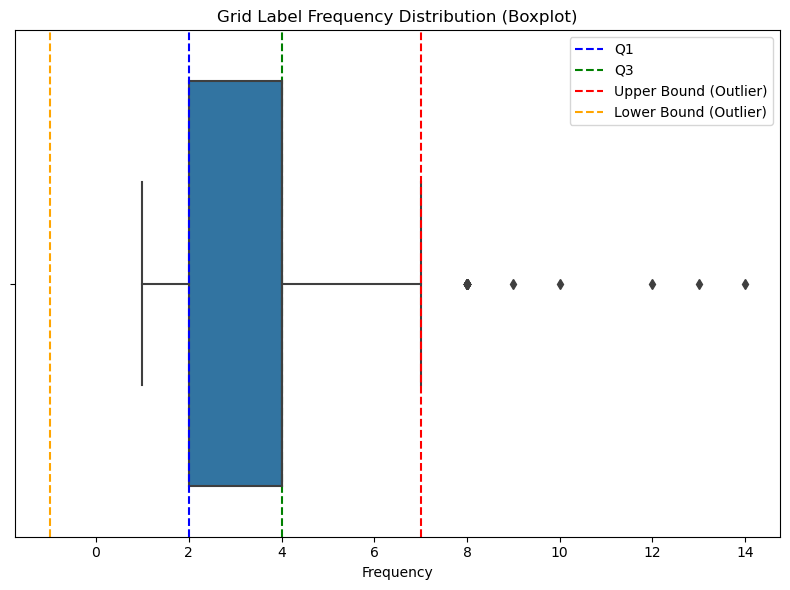

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 반복된 라벨 제거 (연속된 동일 라벨은 하나로 간주)
def CollapseRecurringLabels(original_list):
    if not original_list:
        return []
    
    result_list = [original_list[0]]
    for i in range(1, len(original_list)):
        if original_list[i] != original_list[i - 1]:
            result_list.append(original_list[i])
    return result_list

# IQR 기반 threshold 계산 함수
def compute_threshold(frequencies):
    q1 = np.quantile(frequencies, 0.25)
    q3 = np.quantile(frequencies, 0.75)
    iqr = q3 - q1

    # 이상치 기준 upper/lower bound
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)

    threshold = iqr + upper_bound - lower_bound
    return threshold

# 라벨 데이터 경로
labeled_data_path = "C:/Users/d/OneDrive - 충북대학교/바탕 화면/캡스톤디자인/user_labeled"

# 빈도 딕셔너리 초기화
frequency_dict = {}

# 모든 라벨 파일 순회하며 격자 빈도 계산
for file_name in os.listdir(labeled_data_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(labeled_data_path, file_name)
        df = pd.read_csv(file_path)

        # 'grid_label' 컬럼이 없을 경우 무시
        if 'grid_label' not in df.columns:
            continue

        labels = df['grid_label'].tolist()
        unique_labels = CollapseRecurringLabels(labels)
        df_unique = pd.DataFrame(unique_labels, columns=['grid_label'])

        # 라벨 빈도 계산
        label_counts = df_unique['grid_label'].value_counts().to_dict()

        # 전체 빈도 딕셔너리에 추가
        for label, count in label_counts.items():
            frequency_dict[label] = frequency_dict.get(label, 0) + count

# 결과를 DataFrame으로 변환
frequency_df = pd.DataFrame(list(frequency_dict.items()), columns=['Label', 'Frequency'])

# threshold 계산 및 출력
frequencies = frequency_df['Frequency'].tolist()
threshold = compute_threshold(frequencies)
print(f"Computed threshold based on IQR: {threshold:.2f}")

plt.figure(figsize=(8, 6))
sns.boxplot(x=frequency_df['Frequency'])

# 제목과 라벨 추가
plt.title('Grid Label Frequency Distribution (Boxplot)')
plt.xlabel('Frequency')

# 사분위수 및 IQR 출력
q1 = np.quantile(frequencies, 0.25)
q3 = np.quantile(frequencies, 0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# 선 표시
plt.axvline(q1, color='blue', linestyle='--', label='Q1')
plt.axvline(q3, color='green', linestyle='--', label='Q3')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound (Outlier)')
plt.axvline(lower_bound, color='orange', linestyle='--', label='Lower Bound (Outlier)')

plt.legend()
plt.tight_layout()
plt.show()

In [2]:
import os
import pandas as pd
import numpy as np

# 반복된 라벨 제거 (연속된 동일 라벨은 하나로 간주)
def CollapseRecurringLabels(original_list):
    if not original_list:
        return []
    
    result_list = [original_list[0]]
    for i in range(1, len(original_list)):
        if original_list[i] != original_list[i - 1]:
            result_list.append(original_list[i])
    return result_list

# IQR 기반 threshold 계산 함수
def compute_threshold(frequencies):
    q1 = np.quantile(frequencies, 0.25)
    q3 = np.quantile(frequencies, 0.75)
    iqr = q3 - q1

    # 이상치 기준 upper/lower bound
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)

    threshold = iqr + upper_bound - lower_bound
    return threshold

# 라벨 데이터 경로
labeled_data_path = "C:/Users/d/OneDrive - 충북대학교/바탕 화면/캡스톤디자인/user_labeled"

# 빈도 딕셔너리 초기화
frequency_dict = {}

# 모든 라벨 파일 순회하며 격자 빈도 계산
for file_name in os.listdir(labeled_data_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(labeled_data_path, file_name)
        df = pd.read_csv(file_path)

        # 'grid_label' 컬럼이 없을 경우 무시
        if 'grid_label' not in df.columns:
            continue

        labels = df['grid_label'].tolist()
        unique_labels = CollapseRecurringLabels(labels)
        df_unique = pd.DataFrame(unique_labels, columns=['grid_label'])

        # 라벨 빈도 계산
        label_counts = df_unique['grid_label'].value_counts().to_dict()

        # 전체 빈도 딕셔너리에 추가
        for label, count in label_counts.items():
            frequency_dict[label] = frequency_dict.get(label, 0) + count

# 결과를 DataFrame으로 변환
frequency_df = pd.DataFrame(list(frequency_dict.items()), columns=['Label', 'Frequency'])

# CSV로 저장
# frequency_df.to_csv('label_frequencies.csv', index=False)

# threshold 계산 및 출력
frequencies = frequency_df['Frequency'].tolist()
threshold = compute_threshold(frequencies)
print(f"Computed threshold based on IQR: {threshold:.2f}")

Computed threshold based on IQR: 10.00


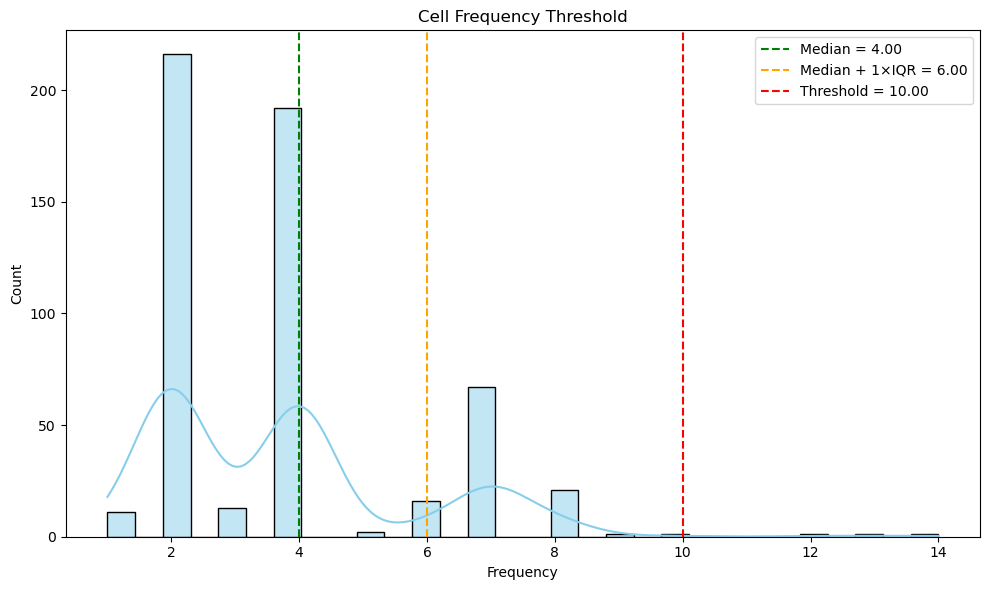

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.histplot(frequency_df['Frequency'], kde=True, bins=30, color='skyblue', edgecolor='black')

# Threshold 계산 요소
q1 = np.quantile(frequencies, 0.25)
q3 = np.quantile(frequencies, 0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
threshold = iqr + upper_bound - lower_bound

# 기준선 그리기
plt.axvline(np.median(frequencies), color='green', linestyle='--', label=f'Median = {np.median(frequencies):.2f}')
plt.axvline(q3 + iqr, color='orange', linestyle='--', label=f'Median + 1×IQR = {(q3 + iqr):.2f}')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.2f}')

# 제목, 레이블
plt.title('Cell Frequency Threshold')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

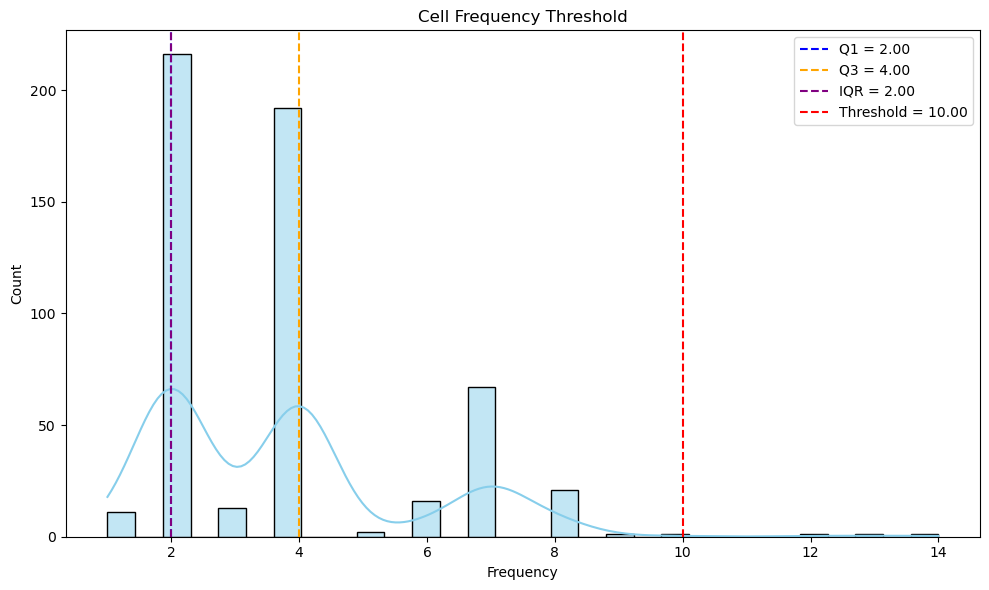

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.histplot(frequency_df['Frequency'], kde=True, bins=30, color='skyblue', edgecolor='black')

# Threshold 계산 요소
q1 = np.quantile(frequencies, 0.25)
q3 = np.quantile(frequencies, 0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
threshold = iqr + upper_bound - lower_bound

# 기준선 그리기
plt.axvline(q1, color='blue', linestyle='--', label=f'Q1 = {q1:.2f}')
plt.axvline(q3, color='orange', linestyle='--', label=f'Q3 = {q3:.2f}')
plt.axvline(iqr, color='purple', linestyle='--', label=f'IQR = {iqr:.2f}')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.2f}')

# 제목, 레이블
plt.title('Cell Frequency Threshold')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()